In [1]:
import import_ipynb
import Trial_MPA
import Trial_PSO
import Trial_GWO
import Trial_SSA
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

df1 = pd.read_csv("diabetes.csv")
df1 = df1[(df1['Glucose'] != 0) & (df1['Insulin'] != 0)]
df1 = df1[(df1['BloodPressure'] != 0) & (df1['SkinThickness'] != 0) & (df1['BMI'] != 0) & (df1['DiabetesPedigreeFunction'] != 0)]
df1 = df1.reset_index(drop=True)
df2 = df1
X = df2.drop('Outcome', axis = 1)
y = df2.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_MPA, accuracy_MPA, specificity_MPA, sensitivity_MPA, prevalence_MPA, f1_score_MPA = Trial_MPA.main(X, y)
model_PSO, accuracy_PSO, specificity_PSO, sensitivity_PSO, prevalence_PSO, f1_score_PSO = Trial_PSO.main(X, y)
model_GWO, accuracy_GWO, specificity_GWO, sensitivity_GWO, prevalence_GWO, f1_score_GWO = Trial_GWO.main(X, y)
model_SSA, accuracy_SSA, specificity_SSA, sensitivity_SSA, prevalence_SSA, f1_score_SSA = Trial_SSA.main(X, y)

MPA: 
Best Position (n_estimators, max_depth, min_samples_split, min_samples_leaf): (15, 13, 9, 8)
Best Value (Accuracy): 0.7959183673469388
PSO: 
Best Position (n_estimators, max_depth, min_samples_split, min_samples_leaf): [58 10  4 10]
Best Value (Accuracy): 0.6530612244897959
GWO: 
Best Position (n_estimators, max_depth, min_samples_split, min_samples_leaf): [10  8  2  1]
Best Value (Accuracy): 0.7346938775510204
SSA: 
Best Position (n_estimators, max_depth, min_samples_split, min_samples_leaf): [14. 14.  6.  2.]
Best Value (Accuracy): 0.7653061224489796


In [2]:
train_accuracies = []
test_accuracies = []
train_pred_MPA = model_MPA.predict(X_train)
test_pred_MPA = model_MPA.predict(X_test)

train_accuracies.append(accuracy_score(y_train, train_pred_MPA))
test_accuracies.append(accuracy_score(y_test, test_pred_MPA))

train_pred_PSO = model_PSO.predict(X_train)
test_pred_PSO = model_PSO.predict(X_test)

train_accuracies.append(accuracy_score(y_train, train_pred_PSO))
test_accuracies.append(accuracy_score(y_test, test_pred_PSO))

train_pred_GWO = model_GWO.predict(X_train)
test_pred_GWO = model_GWO.predict(X_test)

train_accuracies.append(accuracy_score(y_train, train_pred_GWO))
test_accuracies.append(accuracy_score(y_test, test_pred_GWO))

train_pred_SSA = model_SSA.predict(X_train)
test_pred_SSA = model_SSA.predict(X_test)

train_accuracies.append(accuracy_score(y_train, train_pred_SSA))
test_accuracies.append(accuracy_score(y_test, test_pred_SSA))

In [3]:
print(train_accuracies)
print("\n")
print(test_accuracies)

[0.865979381443299, 0.8634020618556701, 0.961340206185567, 0.9484536082474226]


[0.7959183673469388, 0.6530612244897959, 0.7346938775510204, 0.7653061224489796]


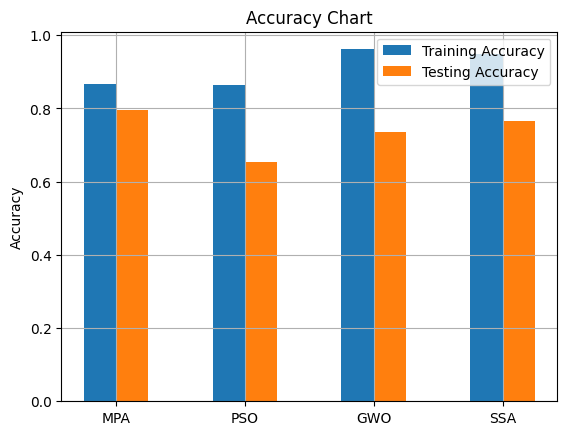

In [4]:
categories = ['MPA', 'PSO', 'GWO', 'SSA']
fig, ax = plt.subplots()
bar_width = 0.25
x = range(len(categories))

# Plot the first series
ax.bar([i - bar_width for i in x], train_accuracies, width=bar_width, label='Training Accuracy')

# Plot the second series
ax.bar([i for i in x], test_accuracies, width=bar_width, label='Testing Accuracy')

# Customize the chart
ax.set_xticks([i - bar_width / 2 for i in x])
ax.set_xticklabels(categories)
ax.set_ylabel('Accuracy')

ax.set_title('Accuracy Chart')
ax.legend()
ax.grid(True)

# Display the chart
plt.show()

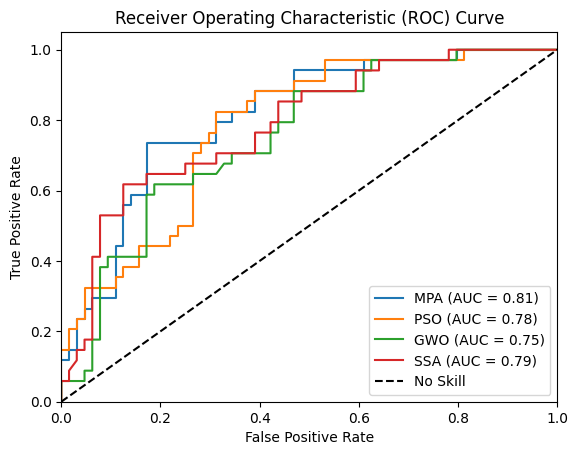

In [9]:
from sklearn.metrics import roc_curve, auc

y_probs = model_MPA.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs)
roc_auc1 = auc(fpr1, tpr1)

y_probs = model_PSO.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs)
roc_auc2 = auc(fpr2, tpr2)

y_probs = model_GWO.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs)
roc_auc3 = auc(fpr3, tpr3)

y_probs = model_SSA.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs)
roc_auc4 = auc(fpr4, tpr4)
# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label='MPA (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='PSO (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='GWO (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='SSA (AUC = %0.2f)' % roc_auc4)

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

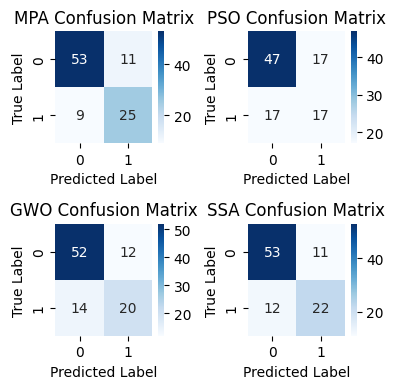

In [16]:
import seaborn as sns
confusion_matrices = [
    confusion_matrix(y_test, test_pred_MPA),
    confusion_matrix(y_test, test_pred_PSO),
    confusion_matrix(y_test, test_pred_GWO),
    confusion_matrix(y_test, test_pred_SSA),
]

# Create a list of model names
model_names = ["MPA", "PSO", "GWO", "SSA"]

# Create a figure and axes for the heatmaps
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

# Iterate over the confusion matrices and model names
for i, (cm, model_name) in enumerate(zip(confusion_matrices, model_names)):
    # Calculate the row and column indices for the current subplot
    row = i // 2
    col = i % 2

    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[row, col])

    # Set the title of the subplot
    axes[row, col].set_title(f"{model_name} Confusion Matrix")

    # Set the x and y labels for the subplot
    axes[row, col].set_xlabel("Predicted Label")
    axes[row, col].set_ylabel("True Label")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

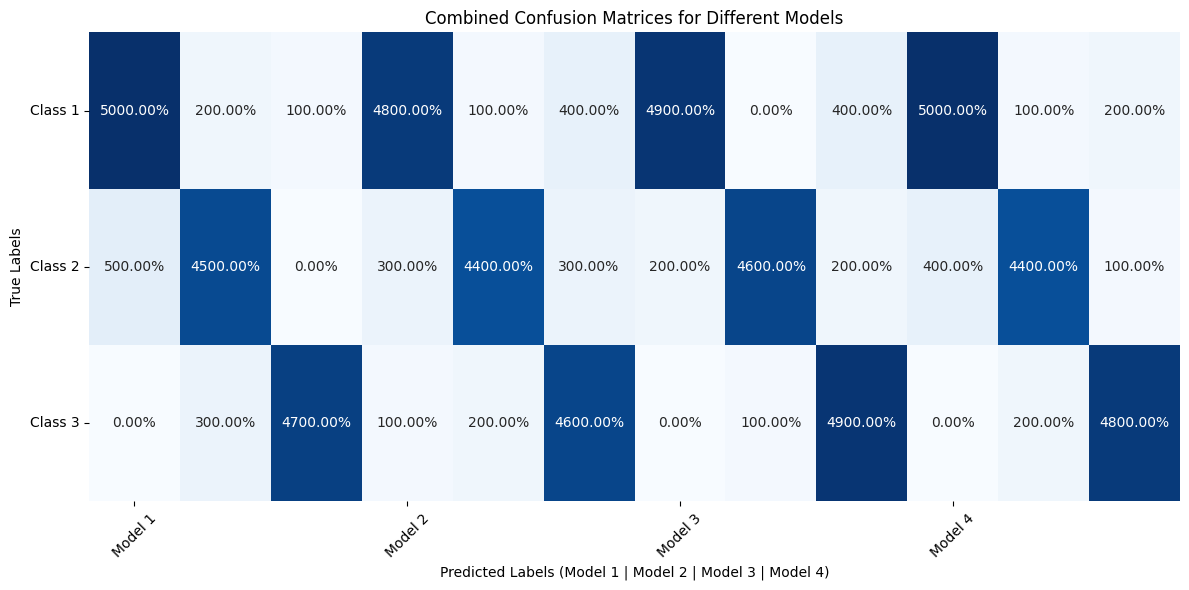

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example confusion matrices for 4 models (3 classes)
# Replace these with your actual confusion matrices
confusion_matrices = [
    np.array([[50, 2, 1], [5, 45, 0], [0, 3, 47]]),  # Model 1
    np.array([[48, 1, 4], [3, 44, 3], [1, 2, 46]]),  # Model 2
    np.array([[49, 0, 4], [2, 46, 2], [0, 1, 49]]),  # Model 3
    np.array([[50, 1, 2], [4, 44, 1], [0, 2, 48]])   # Model 4
]

# Ensure all confusion matrices are integers
confusion_matrices = [cm.astype(int) for cm in confusion_matrices]

# Number of classes
num_classes = confusion_matrices[0].shape[0]

# Create a combined confusion matrix
combined_cm = np.zeros((num_classes, num_classes * len(confusion_matrices)))

for i, cm in enumerate(confusion_matrices):
    combined_cm[:, i * num_classes:(i + 1) * num_classes] = cm

# Create a heatmap for the combined confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(combined_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False)

# Set titles and labels
plt.title('Combined Confusion Matrices for Different Models')
plt.xlabel('Predicted Labels (Model 1 | Model 2 | Model 3 | Model 4)')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(0.5, num_classes * len(confusion_matrices), num_classes), 
           labels=[f'Model {i+1}' for i in range(len(confusion_matrices))], rotation=45)
plt.yticks(ticks=np.arange(0.5, num_classes, 1), labels=[f'Class {i+1}' for i in range(num_classes)], rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()